In [290]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler as m
from keras.models import Sequential as seq
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pandas_datareader import data as pdr

import yfinance as yf

yf.pdr_override()

In [252]:
data=pd.read_excel("1729258-1613615-Stock_Price_data_set_(1).xlsx")
df=data.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [253]:
df.shape

(1009, 6)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [255]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [256]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [257]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [258]:
df.count()

Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [259]:
pd.Series(df.index.unique())

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

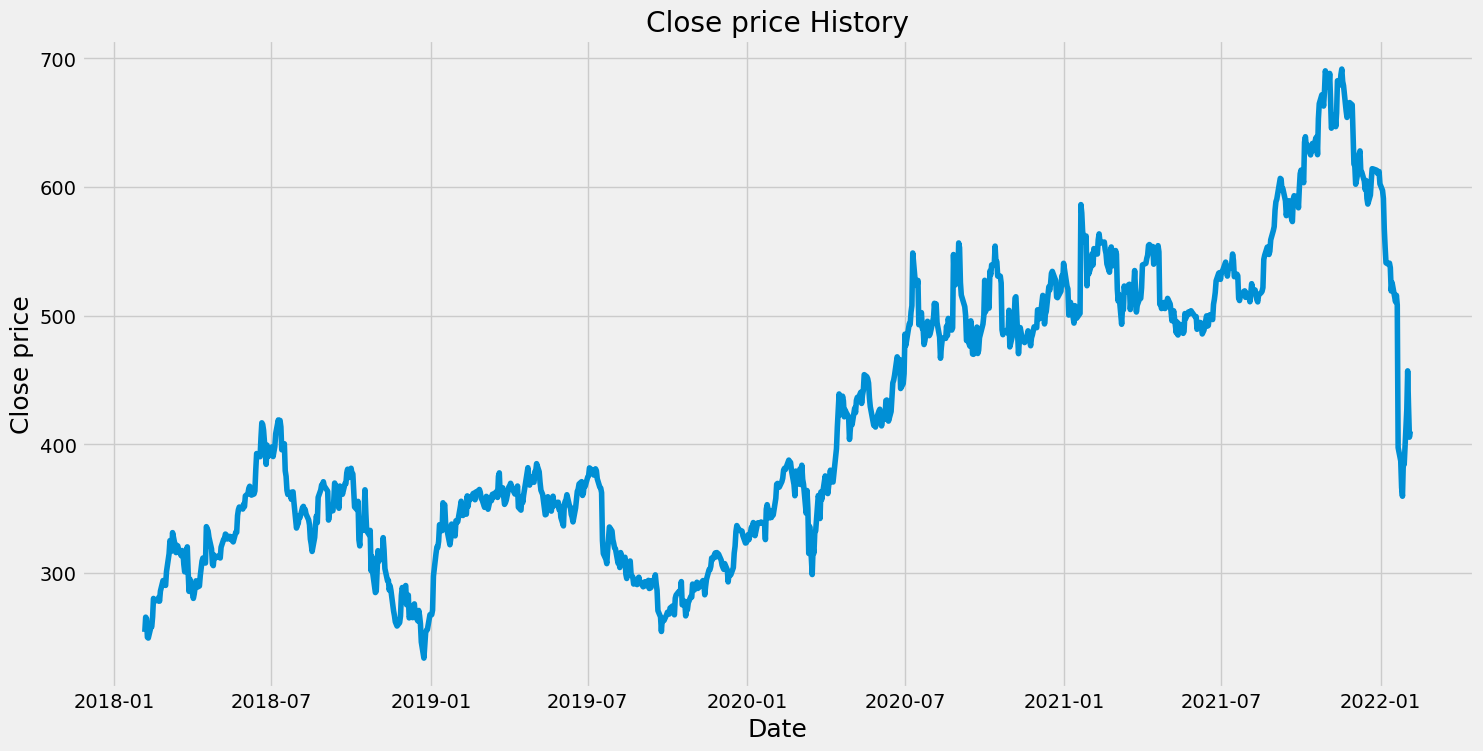

In [260]:
plt.figure(figsize=(16,8))
plt.title("Close price History")
plt.plot(df["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close price", fontsize=18)
plt.show()

In [261]:
#new data frame with only col
Data=df.filter(['Close'])
#convert dataframe to numpy
dataset=Data.values
#get e number to train the model
train_set=math.ceil(len(dataset)*0.8)  # training the 80% of the data
train_set


808

In [262]:
#Scale Data #pre processing the data 
scalar = m(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)

scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [263]:
#create training set
#create the scaled data set
training_data=scaled_data[0:train_set, :]
#split into x train and ytrain
x_train=[]  #independent training variable or training features
y_train=[]    #dependent training or target variable

for i in range(60,len(training_data)):
    x_train.append(training_data[i-60:i,0]) # 0 col 60 val index 0 from 59
    y_train.append(training_data[i,0])  #60 first value 
   

In [264]:
#convert xtrain and ytrain to numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

In [265]:
#re-shape the data , as data needs to be in 3d right now is 2d
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))   # we need to input the number of sample or features which is rows
x_train.shape

(748, 60, 1)

In [266]:
#LSTM Model
model=seq()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))  # use LSTM model again that is why true
model.add(LSTM(50,return_sequences=False))     # false we will not use LSTM agian
model.add(Dense(25))
model.add(Dense(1))

 optimizer is used to improve loss function and loss func is used to measure the model how well it did on training 

In [267]:
#complile th model
model.compile(optimizer='adam', loss='mean_squared_error')  


epoch is no of iterations when an entire dataset pass and back through nueral network

batch_size is total no of training samples present in a single batch 

In [268]:
#Train the model
model.fit(x_train,y_train,batch_size=1, epochs=1) 


748/748 [==============================] - 15s 16ms/step - loss: 0.0033


In [269]:
#create testing dataset
# create new array that have scaled value from index remaining
test_data = scaled_data[train_set-60:, :]
#create dataset xteat and ytest
x_test=[]
y_test=dataset[train_set:, :]   # y will be all of the values that we want our model to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])  # it contain past 60 values  (normaol values)
    
    


In [270]:
#convert data to nummpy
x_test = np.array(x_test)
#y_test = np.array(y_test)

In [271]:
#reshape to 3d 1 is close price
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [272]:
#Get the models predicted price value 
pred=model.predict(x_test)
pred = scalar.inverse_transform(pred) #unscaling same as y 

7/7 [==============================] - 1s 11ms/step


In [273]:
#get the root mean square accuracy of model (lower value indicate better fit)
rmse=np.sqrt(np.mean(pred-y_test)**2)
rmse

3.0609270762981953

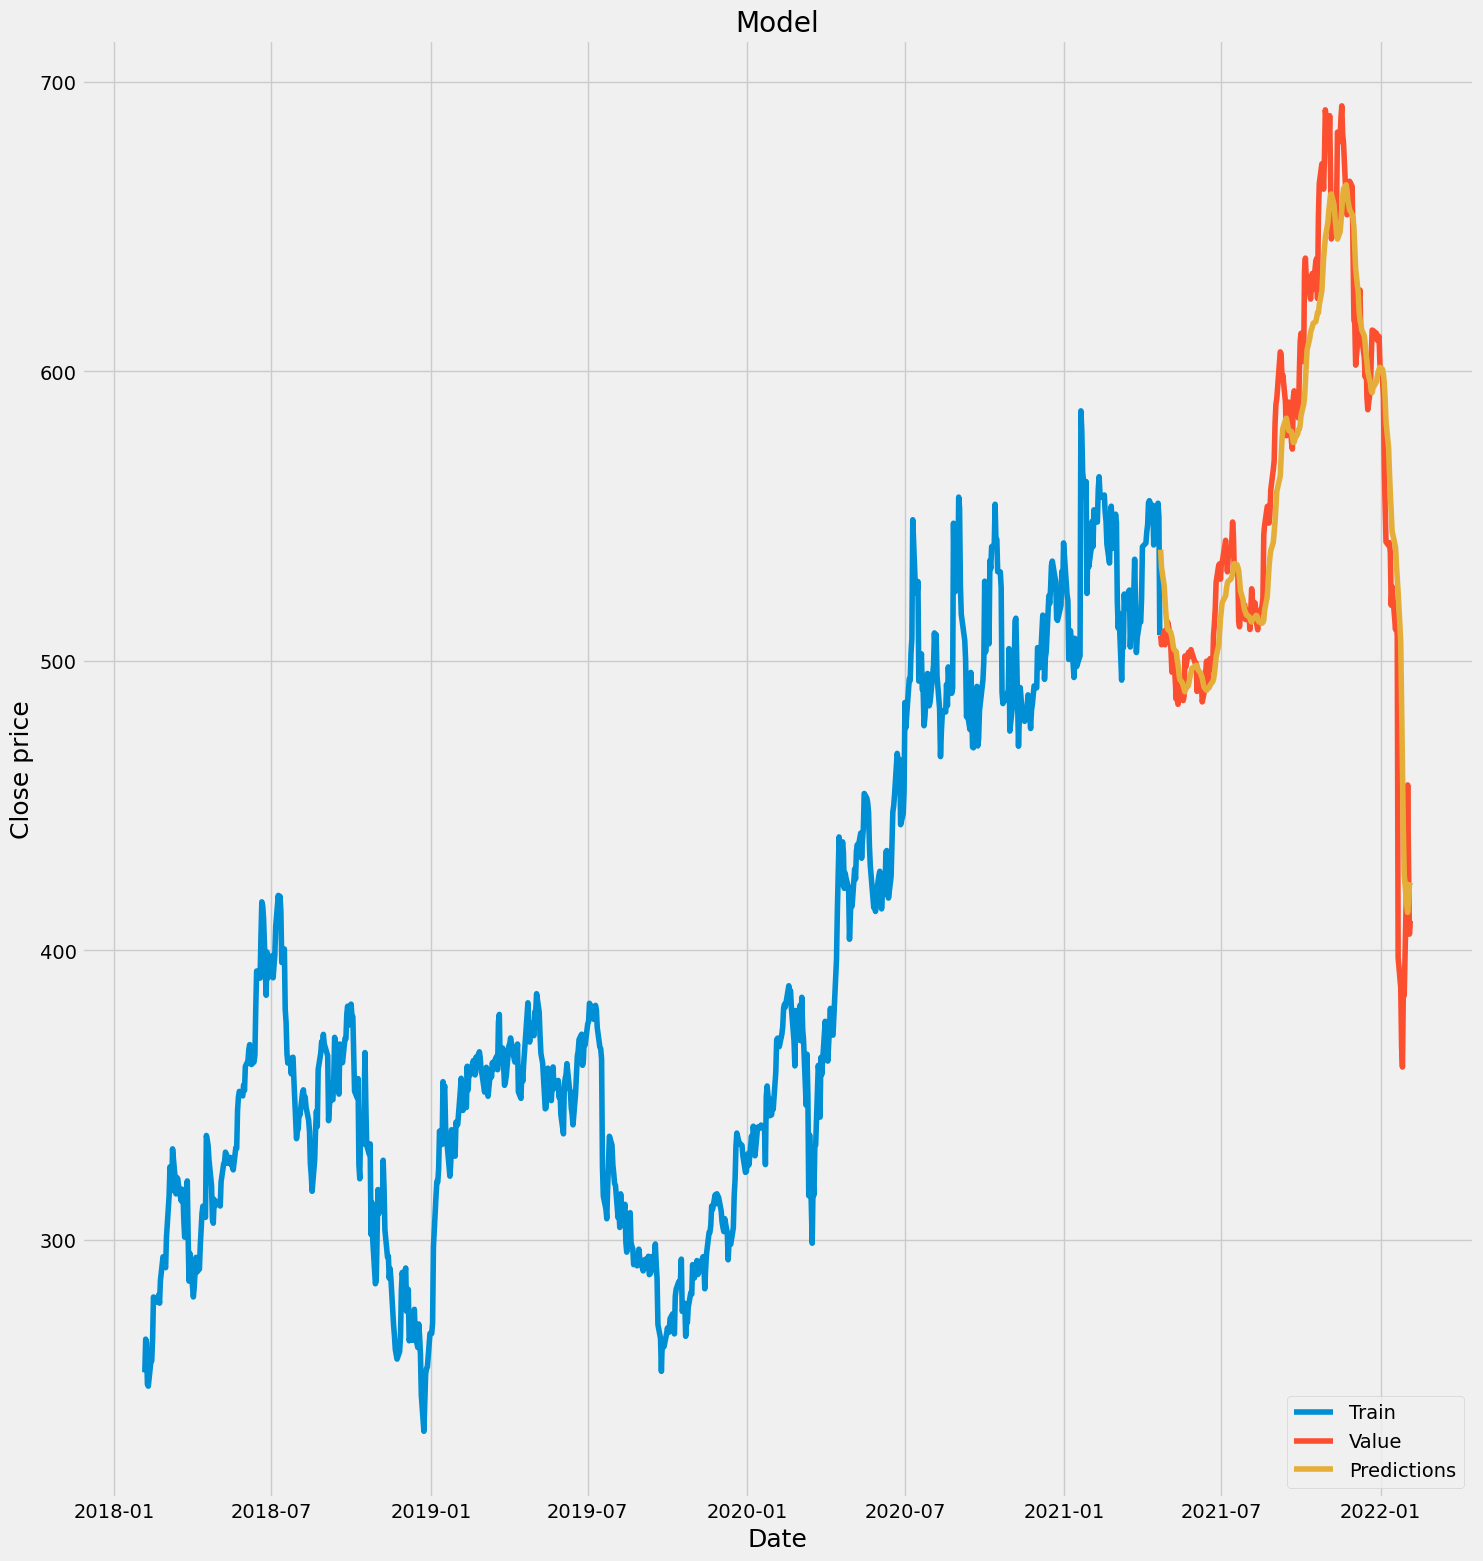

In [274]:
#plot the data
train=Data[:train_set]
valid=Data[train_set:]
valid['Predictions']=pred
#visualise
plt.figure(figsize=(16,18))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'], loc='lower right')
plt.show()

In [275]:
#show valid and predictice prices
valid

,Close,Predictions
Date,,
2021-04-22,508.779999,538.390320
2021-04-23,505.549988,532.324402
2021-04-26,510.299988,525.998535
2021-04-27,505.549988,520.969910
2021-04-28,506.519989,516.584412
...,...,...
2022-01-31,427.140015,415.571381
2022-02-01,457.130005,413.124298
2022-02-02,429.480011,418.072876


In [311]:
# Test with other data
apple_quote=pdr.get_data_yahoo('AAPL',start='2018-01-01', end='2024-01-01')
#create nwe dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 days closing price value and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scalar.transform(last_60_days)
#create an empty list
x_apple_test=[]
#append the 60 days data
x_apple_test.append(last_60_days_scaled)
#convert the x test to munpy array
x_apple_test=np.array(x_apple_test)
#reshape
x_apple_test=np.reshape(x_apple_test,(x_apple_test.shape[0],x_apple_test.shape[1],1))
#get the predicted price scaled
pred_price=model.predict(x_apple_test)
#undo the scale
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 35ms/step
[[197.89642]]


In [309]:
# Test with other data
apple_quote2 = pdr.get_data_yahoo('AAPL',start='2021-12-30', end='2022-01-01')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2021-12-30    178.199997
2021-12-31    177.570007
Name: Close, dtype: float64
